In [37]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.metrics import roc_curve, auc, accuracy_score
import re
import nltk

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("TweetsDF_clean.csv")

In [5]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [6]:
#Removing the html strips

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on text column
df['text']=df['text'].apply(denoise_text)

In [7]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on text column
df['text']=df['text'].apply(remove_special_characters)

In [8]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on text column
df['text']=df['text'].apply(simple_stemmer)

In [9]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on text column
df['text']=df['text'].apply(remove_stopwords)

{'why', 'on', 'her', 'in', 'by', 'same', 'will', "hasn't", 'no', 'hadn', 'out', 'more', 'nor', 'are', 'being', 'now', 'm', "that'll", 'below', 'after', 'so', 'because', 'do', "you're", 'too', 'during', 'does', 'having', 'his', 'as', 'at', "won't", "couldn't", 'shan', "wasn't", 've', 'itself', 'further', 'with', 'you', 'o', 'couldn', 'mightn', 'won', 'he', 'hasn', 'i', 'she', "you'll", 'under', 'here', "hadn't", 'isn', 'over', "needn't", 'was', 'but', 's', 'them', 'yourself', 'been', 'for', 'll', 'through', 'didn', 'other', 'up', 'himself', 'shouldn', "isn't", 'between', "mightn't", 'above', 'into', 'each', 'than', 'has', "doesn't", 'while', 'doesn', "should've", 'not', 'if', 'mustn', 'doing', 'when', "she's", 'hers', 'which', 'only', 'herself', 'd', 'their', 'any', 'own', 'those', 'needn', 'of', 'we', 'yourselves', 'should', 'were', 'both', 'until', 'our', 'where', 'there', 'before', 'or', "you'd", 'again', 'a', 'such', 'can', 'what', 'ain', 'ours', "mustn't", 'about', 'its', 'him', "y

In [10]:
df['label'] = ''
for i,x in df.text.iteritems():
    label = TextBlob(x)
    df['label'][i] = label.sentiment.polarity
    print("Index: ", i ,  "label" , label.sentiment.polarity)

Index:  0 label 0.0
Index:  1 label 0.14285714285714285
Index:  2 label 0.0
Index:  3 label 0.0
Index:  4 label 0.0
Index:  5 label 0.6
Index:  6 label 0.0
Index:  7 label 0.0
Index:  8 label -0.4
Index:  9 label 0.0
Index:  10 label -0.04999999999999999
Index:  11 label 0.0
Index:  12 label 0.0
Index:  13 label -0.056249999999999994
Index:  14 label 0.0
Index:  15 label 0.0
Index:  16 label 0.0
Index:  17 label 0.0
Index:  18 label 0.0
Index:  19 label 0.0
Index:  20 label 0.0
Index:  21 label 0.0
Index:  22 label -0.5
Index:  23 label 0.0
Index:  24 label 0.0
Index:  25 label -0.4
Index:  26 label 0.5
Index:  27 label 0.0
Index:  28 label 0.0
Index:  29 label -0.4
Index:  30 label -0.4
Index:  31 label -0.4
Index:  32 label 0.0
Index:  33 label 0.0
Index:  34 label 0.13636363636363635
Index:  35 label 0.0
Index:  36 label 0.0
Index:  37 label 0.0
Index:  38 label 0.3333333333333333
Index:  39 label 0.0
Index:  40 label 0.0
Index:  41 label 1.0
Index:  42 label 0.0
Index:  43 label 0.

In [11]:
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return -1
    if(x == 0):
        return 0
    if(x > 0 and x <= 1):
        return 1
df.label = df.label.apply(polarity_to_label)

df.head()

,text,favorited,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted,label
0,aluno nome rhaast idad 27 ano universo leagu l...,False,0,2022-09-27 02:58:10,True,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",Instituto_Grey,0,False,False,0
1,rt jacksonstanton6 juliaknowsit ah see bought ...,False,0,2022-09-27 02:58:08,False,1.574594e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",trolleybacon,1,True,False,1
2,rt cblol hello crocjg tem um pedido faa l imed...,False,0,2022-09-27 02:58:03,False,1.574594e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SonHeathcliff,91,True,False,0
3,leagu legend,False,0,2022-09-27 02:57:42,False,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",Instituto_Grey,0,False,False,0
4,rt xricoadk mejorando el leagu legend httpstco...,False,0,2022-09-27 02:57:18,False,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",im_raqhm,99,True,False,0


In [12]:
df.label.value_counts()

 0    5326
-1    2724
 1    1950
Name: label, dtype: int64

In [13]:
train_text = df.text[:8000]
train_label = df.label[:8000]

test_text = df.text[8000:]
test_label = df.label[8000:]

print(train_text.shape,train_label.shape)
print(test_text.shape,test_label.shape)

(8000,) (8000,)
(2000,) (2000,)


In [14]:
#normalized train text
norm_train_text=df.text[:8000]
norm_train_text[0]

'aluno nome rhaast idad 27 ano universo leagu legend poder olhar da penitncia e manipulao httpstcomism8bbeav'

In [15]:
#Normalized test text
norm_test_text=df.text[8000:]
norm_test_text[9999]

'fight someon vc whole fight end cuz ask play leagu legend said n httpstcovv4ppgtq9v'

In [16]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train text
cv_train_text=cv.fit_transform(norm_train_text)
#transformed test text
cv_test_text=cv.transform(norm_test_text)

print('BOW_cv_train:',cv_train_text.shape)
print('BOW_cv_test:',cv_test_text.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (8000, 34493)
BOW_cv_test: (2000, 34493)


In [17]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train text
tv_train_text=tv.fit_transform(norm_train_text)
#transformed test text
tv_test_text=tv.transform(norm_test_text)
print('Tfidf_train:',tv_train_text.shape)
print('Tfidf_test:',tv_test_text.shape)

Tfidf_train: (8000, 34493)
Tfidf_test: (2000, 34493)


In [18]:
train_label = df[["label"]][:8000].to_numpy()
test_label = df[["label"]][8000:].to_numpy()
print(train_label)
print(test_label)

[[ 0]
 [ 1]
 [ 0]
 ...
 [-1]
 [ 1]
 [ 1]]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [19]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_text,train_label)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_text,train_label)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [20]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_text)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_text)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [21]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_label,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_label,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)


mnb_bow_score : 0.6445
mnb_tfidf_score : 0.6465


In [22]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_label,mnb_bow_predict,target_names=['Neutral','Negative','Positive'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_label,mnb_tfidf_predict,target_names=['Neutral','Negative','Positive'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

     Neutral       0.60      0.09      0.16       278
    Negative       0.64      0.99      0.78      1257
    Positive       0.95      0.04      0.07       465

    accuracy                           0.64      2000
   macro avg       0.73      0.37      0.34      2000
weighted avg       0.71      0.64      0.53      2000

              precision    recall  f1-score   support

     Neutral       0.85      0.08      0.14       278
    Negative       0.64      1.00      0.78      1257
    Positive       1.00      0.04      0.07       465

    accuracy                           0.65      2000
   macro avg       0.83      0.37      0.33      2000
weighted avg       0.75      0.65      0.53      2000



In [23]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_label,mnb_bow_predict,labels=[0,-1,1])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_label,mnb_tfidf_predict,labels=[0,-1,1])
print(cm_tfidf)

[[1245   11    1]
 [ 252   26    0]
 [ 441    6   18]]
[[1254    3    0]
 [ 256   22    0]
 [ 447    1   17]]


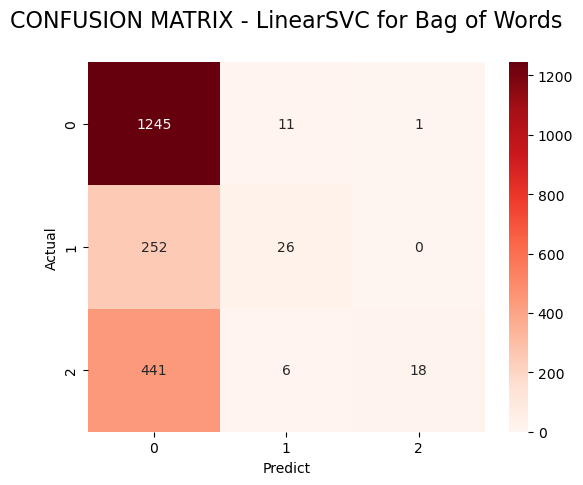

In [34]:
# Visualize the confusion matrix
sns.heatmap(cm_bow, annot=True, cmap="Reds", fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predict')
plt.title("CONFUSION MATRIX - LinearSVC for Bag of Words\n", size=16);

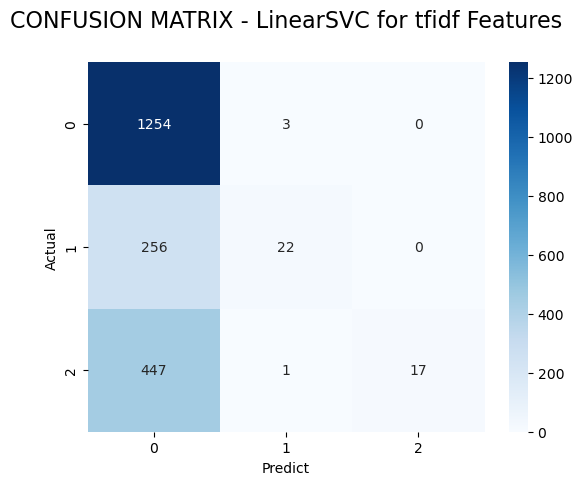

In [35]:
sns.heatmap(cm_tfidf, annot=True, cmap="Blues", fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predict')
plt.title("CONFUSION MATRIX - LinearSVC for tfidf Features\n", size=16);

In [25]:
df['text_len'] = df.text.apply(len)
df.head()

,text,favorited,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted,label,text_len
0,aluno nome rhaast idad 27 ano universo leagu l...,False,0,2022-09-27 02:58:10,True,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",Instituto_Grey,0,False,False,0,107
1,rt jacksonstanton6 juliaknowsit ah see bought ...,False,0,2022-09-27 02:58:08,False,1.574594e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",trolleybacon,1,True,False,1,94
2,rt cblol hello crocjg tem um pedido faa l imed...,False,0,2022-09-27 02:58:03,False,1.574594e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SonHeathcliff,91,True,False,0,111
3,leagu legend,False,0,2022-09-27 02:57:42,False,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",Instituto_Grey,0,False,False,0,12
4,rt xricoadk mejorando el leagu legend httpstco...,False,0,2022-09-27 02:57:18,False,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",im_raqhm,99,True,False,0,56


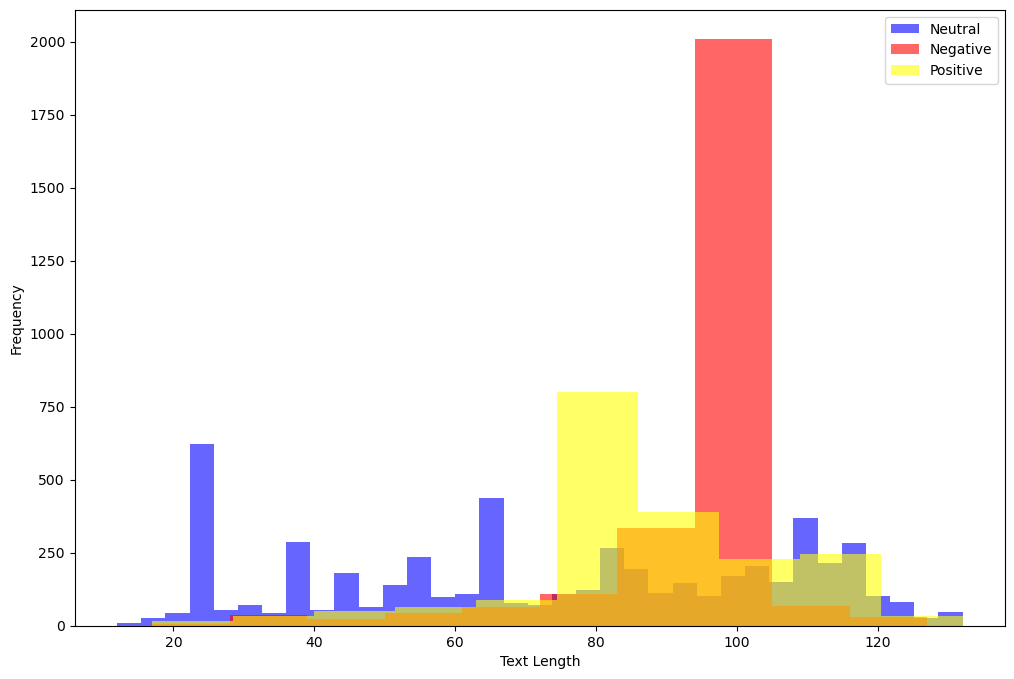

In [36]:
#Visualize the text data
plt.figure(figsize=(12, 8))

df[df.label==0].text_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Neutral', alpha=0.6)
df[df.label==-1].text_len.plot(kind='hist', color='red', 
                                       label='Negative', alpha=0.6)
df[df.label==1].text_len.plot(kind='hist', color='yellow', label='Positive', alpha=0.6)
plt.legend()
plt.xlabel("Text Length");